In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('music_genre_dataset.csv')

In [3]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
df.rename(columns={'Artist Name':'Artist_Name','Track Name':"Track_Name"},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15517 entries, 0 to 15516
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist_Name         15517 non-null  object 
 1   Track_Name          15517 non-null  object 
 2   Popularity          15123 non-null  float64
 3   danceability        15517 non-null  float64
 4   energy              15517 non-null  float64
 5   key                 13774 non-null  float64
 6   loudness            15517 non-null  float64
 7   mode                15517 non-null  int64  
 8   speechiness         15517 non-null  float64
 9   acousticness        15517 non-null  float64
 10  instrumentalness    11930 non-null  float64
 11  liveness            15517 non-null  float64
 12  valence             15517 non-null  float64
 13  tempo               15517 non-null  float64
 14  duration_in min/ms  15517 non-null  float64
 15  time_signature      15517 non-null  int64  
 16  Clas

In [6]:
df.isnull().mean()*100

Artist_Name            0.000000
Track_Name             0.000000
Popularity             2.539151
danceability           0.000000
energy                 0.000000
key                   11.232841
loudness               0.000000
mode                   0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness      23.116582
liveness               0.000000
valence                0.000000
tempo                  0.000000
duration_in min/ms     0.000000
time_signature         0.000000
Class                  0.000000
dtype: float64

In [7]:
df['Class'].unique()

array([ 5, 10,  6,  2,  4,  8,  3,  7,  1,  9,  0])

### Dropping column instrumentalness because 23% of data is missing

In [8]:
df.drop(columns='instrumentalness',inplace=True)

### Drop popularity null rows as they are small amount

In [9]:
df.drop(df[df['Popularity'].isnull()].index,inplace=True)

### Lets Check the keys column

In [10]:
df['key'].unique()

array([ 1.,  3.,  6., 10.,  2.,  5.,  7.,  9., 11.,  8., nan,  4.])

<AxesSubplot:xlabel='key', ylabel='Class'>

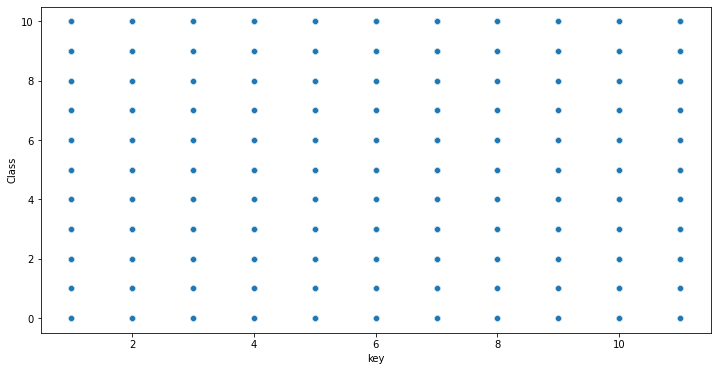

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='key',y='Class',data=df)

In [12]:
df.groupby(['Class'])['key'].median()


Class
0     6.0
1     6.0
2     7.0
3     6.0
4     6.0
5     6.0
6     6.0
7     5.0
8     6.0
9     6.0
10    6.0
Name: key, dtype: float64

### Drop key column as it doesn't affect the target class

In [13]:
df.drop(columns='key',inplace=True)

In [14]:
df.isnull().sum()

Artist_Name           0
Track_Name            0
Popularity            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [15]:
df.head()

,Artist_Name,Track_Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,10


## Feature Engineering 
### Discretizing tempo to different classes

In [16]:
t = pd.cut(df.tempo, [25,76,120,176,220],labels=['Slow','Moderate','Fast','Very Fast'])
df["tempo_class"] = t

In [17]:
def feelings(valence,energy):
    if(valence>=0.5):
        if(energy>=0.5):
            return "Happy"
        else:
            return "Relaxed"
    else:
        if(energy>=0.5):
            return "Angry"
        else:
            return "Sad"

### Calculating feelings from valence and energy

In [18]:
df['feelings']=df.apply(lambda x: feelings(x['valence'],x['energy']),axis=1)

In [19]:
df['feelings']

0          Happy
1          Happy
2          Happy
3          Happy
4          Angry
          ...   
15512      Happy
15513      Angry
15514    Relaxed
15515      Angry
15516      Angry
Name: feelings, Length: 15123, dtype: object

### Calculate song duration to minutes

In [20]:
def minutes(duration):
     if((str(duration)[1]!=".") | (str(duration)[2]!=".") ):
        return (duration/1000)/60
     else:
        return duration

In [21]:
df['song_duration']=df.apply(lambda x: minutes(x['duration_in min/ms']),axis=1)

In [22]:
df['loudness'].min()

-36.214

In [23]:
df.drop(columns=['duration_in min/ms','valence','energy','tempo'],inplace=True)

In [24]:
df.head()

,Artist_Name,Track_Name,Popularity,danceability,loudness,mode,speechiness,acousticness,liveness,time_signature,Class,tempo_class,feelings,song_duration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,-4.964,1,0.0485,0.017100,0.0849,4,5,Fast,Happy,3.909933
1,Boston,Hitch a Ride,54.0,0.382,-7.230,1,0.0406,0.001100,0.1010,4,10,Moderate,Happy,4.195550
2,The Raincoats,No Side to Fall In,35.0,0.434,-8.334,1,0.0525,0.486000,0.3940,4,6,Fast,Happy,1.827783
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,-6.528,0,0.0555,0.021200,0.1220,4,5,Moderate,Happy,2.899467
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,-4.279,1,0.2160,0.000169,0.1720,4,10,Very Fast,Angry,3.832667


In [25]:
df.isnull().sum()

Artist_Name       0
Track_Name        0
Popularity        0
danceability      0
loudness          0
mode              0
speechiness       0
acousticness      0
liveness          0
time_signature    0
Class             0
tempo_class       0
feelings          0
song_duration     0
dtype: int64

# We will use pyspark to perform queries for analytics

In [26]:
!pip install pyspark
!pip install findspark
!pip install pyarrow==1.0.0

     |████████████████████████████████| 281.4 MB 1.3 MB/s eta 0:00:01    |██▊                             | 24.1 MB 1.8 MB/s eta 0:02:22     |██████████████▋                 | 128.9 MB 3.6 MB/s eta 0:00:42     |███████████████████████         | 202.9 MB 5.3 MB/s eta 0:00:15     |████████████████████████████▋   | 251.6 MB 1.4 MB/s eta 0:00:22
     |████████████████████████████████| 198 kB 2.0 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853646 sha256=0a666425ecb127912414f23e08dc50af41625ebcb173ae0e528834295088aea7
  Stored in directory: /Users/layanmahmoud/Library/Caches/pip/wheels/58/94/83/915c9059e4b038e2d43a6058f307fe1c3e8536e5745f3b23b7
Successfully built pyspark


In [27]:
import findspark
findspark.init()
import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [28]:
sc = SparkContext()

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [29]:
sdf = spark.createDataFrame(df) 

In [30]:
sdf.createTempView("music")

### How many songs are played for each feeling?

In [31]:
feelings_songs=spark.sql("""
SELECT feelings,COUNT(*) number_of_songs
FROM music
GROUP BY feelings
ORDER BY 2 DESC
"""
)

In [32]:
feelings_songs.show()

+--------+---------------+
|feelings|number_of_songs|
+--------+---------------+
|   Happy|           6222|
|   Angry|           5431|
|     Sad|           2478|
| Relaxed|            992|
+--------+---------------+



In [33]:
feelings_songs=feelings_songs.toPandas()

Text(0.5, 1.0, 'Number of songs for each feeling')

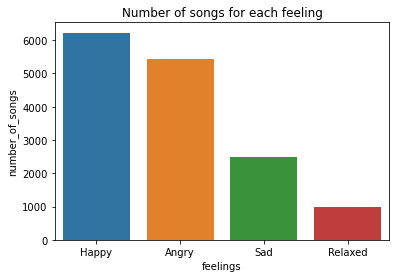

In [34]:
sns.barplot(x='feelings',y='number_of_songs',data=feelings_songs)
plt.title("Number of songs for each feeling")

### Who are the top 10 popular artists? 

In [35]:
popular_artists=spark.sql("""
SELECT Artist_Name,COUNT(*) number_of_songs
FROM music
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
"""
)
popular_artists.show()

+------------------+---------------+
|       Artist_Name|number_of_songs|
+------------------+---------------+
|   Backstreet Boys|             66|
|    Britney Spears|             43|
|The Rolling Stones|             32|
|                U2|             29|
|         Metallica|             27|
|          Westlife|             27|
|   Lata Mangeshkar|             23|
|             AC/DC|             23|
|      Led Zeppelin|             22|
|           Nirvana|             22|
+------------------+---------------+



In [36]:
popular_artists=popular_artists.toPandas()

<AxesSubplot:title={'center':'Popular 10 Artists'}, xlabel='Artist_Name', ylabel='number_of_songs'>

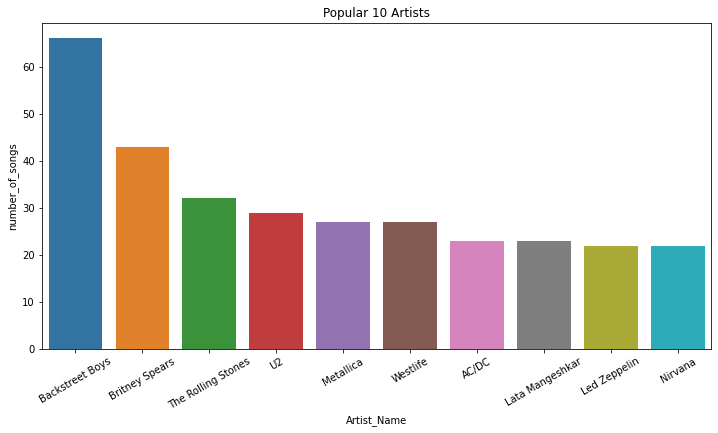

In [37]:
plt.figure(figsize=[12,6])
plt.xticks(rotation=30)
plt.title("Popular 10 Artists")
sns.barplot(x='Artist_Name',y='number_of_songs',data=popular_artists)

### What are the names of the 10 longest songs?

In [38]:
longest_songs=spark.sql("""
SELECT Track_Name,ROUND(song_duration,2) duration
FROM music
ORDER BY 2 DESC
LIMIT 10
"""
)
longest_songs.show()

+--------------------+--------+
|          Track_Name|duration|
+--------------------+--------+
|              Cities|   24.62|
|              Echoes|   23.54|
|A Plague Of Light...|   23.21|
|      Supper's Ready|    23.1|
|Supper's Ready - ...|    23.1|
|Nagumomu - Abheri...|   21.41|
|              Tarkus|   20.74|
|2112: Overture / ...|   20.56|
|Close to the Edge...|   18.69|
|Close to the Edge...|   18.69|
+--------------------+--------+



In [39]:
longest_songs=longest_songs.toPandas()

<AxesSubplot:title={'center':'Longest 10 songs'}, xlabel='duration', ylabel='Track_Name'>

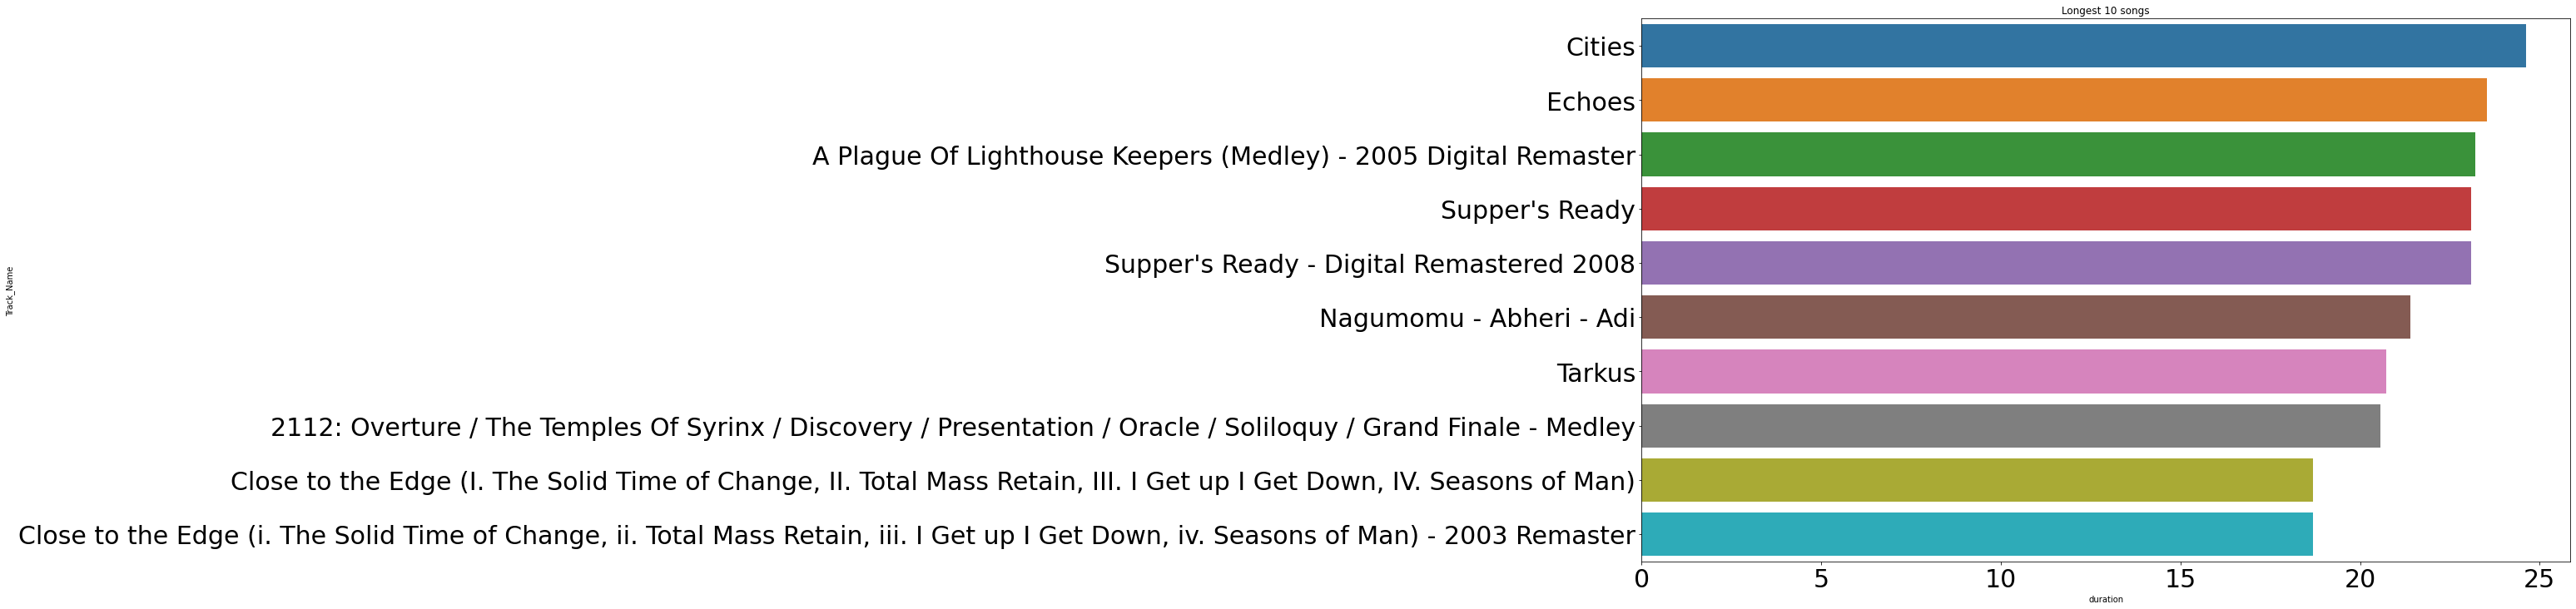

In [40]:
plt.figure(figsize=[20,12])
plt.title("Longest 10 songs")
plt.yticks(size=30)
plt.xticks(size=30)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
sns.barplot(x='duration',y='Track_Name',data=longest_songs)

In [41]:
df.head()

,Artist_Name,Track_Name,Popularity,danceability,loudness,mode,speechiness,acousticness,liveness,time_signature,Class,tempo_class,feelings,song_duration
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,-4.964,1,0.0485,0.017100,0.0849,4,5,Fast,Happy,3.909933
1,Boston,Hitch a Ride,54.0,0.382,-7.230,1,0.0406,0.001100,0.1010,4,10,Moderate,Happy,4.195550
2,The Raincoats,No Side to Fall In,35.0,0.434,-8.334,1,0.0525,0.486000,0.3940,4,6,Fast,Happy,1.827783
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,-6.528,0,0.0555,0.021200,0.1220,4,5,Moderate,Happy,2.899467
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,-4.279,1,0.2160,0.000169,0.1720,4,10,Very Fast,Angry,3.832667


# Machine Learning models to predict song genre
### Creating dummy variables for tempo_class, feelings to be used in the model


In [42]:
dummies = pd.get_dummies(df[['tempo_class', 'feelings' ]],drop_first=True)
df = df.drop(['Artist_Name','Track_Name','tempo_class', 'feelings'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [43]:
df.head()

,Popularity,danceability,loudness,mode,speechiness,acousticness,liveness,time_signature,Class,song_duration,tempo_class_Moderate,tempo_class_Fast,tempo_class_Very Fast,feelings_Happy,feelings_Relaxed,feelings_Sad
0,60.0,0.854,-4.964,1,0.0485,0.017100,0.0849,4,5,3.909933,0,1,0,1,0,0
1,54.0,0.382,-7.230,1,0.0406,0.001100,0.1010,4,10,4.195550,1,0,0,1,0,0
2,35.0,0.434,-8.334,1,0.0525,0.486000,0.3940,4,6,1.827783,0,1,0,1,0,0
3,66.0,0.853,-6.528,0,0.0555,0.021200,0.1220,4,5,2.899467,1,0,0,1,0,0
4,53.0,0.167,-4.279,1,0.2160,0.000169,0.1720,4,10,3.832667,0,0,1,0,0,0


In [44]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier

### Models Without Removing Outliers

In [45]:
sdf2 = spark.createDataFrame(df) 
sdf2.createTempView("music2")

In [46]:
numericCols=sdf2.columns

In [47]:
numericCols.remove('Class')
# numericCols.remove('mode')
# numericCols.remove('Class')
# numericCols.remove('tempo_class_Moderate')
# numericCols.remove('tempo_class_Fast')
# numericCols.remove('tempo_class_Very Fast')


In [48]:
featurizationPipeline = Pipeline(stages = [VectorAssembler(inputCols=numericCols, outputCol="feature_vector")])


In [49]:
featurizationPipelineModel = featurizationPipeline.fit(sdf2)
sdf2=featurizationPipelineModel.transform(sdf2)


### Logistic Regression Model

In [50]:
train, test = sdf2.randomSplit([0.8, 0.20], seed = 2018)
lr = LogisticRegression(featuresCol = 'feature_vector', labelCol = 'Class', maxIter=100)

lrModel = lr.fit(train)
predictions = lrModel.transform(test)

true_labels=predictions.select('Class')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Logistic Regression Accuracy =",accuracy*100,"%")

Logistic Regression Accuracy = 48.588312541037425 %


### Decistion Tree Model

In [51]:
# train, test = sdf2.randomSplit([0.8, 0.2], seed = 2018)
dt = DecisionTreeClassifier(featuresCol = 'feature_vector', labelCol = 'Class')

dtModel = dt.fit(train)
predictions = dtModel.transform(test)

true_labels=predictions.select('Class')
dt_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), dt_predictions.toPandas())
print("Decision Tree Accuracy =",accuracy*100,"%")

Decision Tree Accuracy = 45.30531845042679 %


### Random Forrest Model

In [52]:
train, test = sdf2.randomSplit([0.8, 0.2], seed = 2018)
dt = RandomForestClassifier(featuresCol = 'feature_vector', labelCol = 'Class')

dtModel = dt.fit(train)
predictions = dtModel.transform(test)

true_labels=predictions.select('Class')
dt_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), dt_predictions.toPandas())
print("Random Forrest Accuracy =",accuracy*100,"%")

Random Forrest Accuracy = 47.209455022980954 %


### Model with removing Outliers

In [53]:
df2=df.copy()

In [54]:
columns=['loudness','acousticness','song_duration','speechiness',]
outliers_count=0
for col in columns:
    z = np.abs(stats.zscore(df2[col]))
    filtered_entries = z < 3
    outliers_count+=(z >=3).sum()
    df2=df2[filtered_entries]
print("outliers count is ",outliers_count)

outliers count is  821


In [55]:
sdf_outliers = spark.createDataFrame(df2) 
sdf_outliers.createTempView("music_outliers")
numericCols=sdf_outliers.columns
numericCols.remove('Class')
featurizationPipeline = Pipeline(stages = [VectorAssembler(inputCols=numericCols, outputCol="feature_vector2")])
featurizationPipelineModel = featurizationPipeline.fit(sdf_outliers)
sdf_outliers=featurizationPipelineModel.transform(sdf_outliers)


### Logistic Regression Model

In [56]:
train, test = sdf_outliers.randomSplit([0.8, 0.20], seed = 2018)
lr = LogisticRegression(featuresCol = 'feature_vector2', labelCol = 'Class', maxIter=100)

lrModel = lr.fit(train)
predictions = lrModel.transform(test)

true_labels=predictions.select('Class')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Logistic Regression Accuracy =",accuracy*100,"%")

Logistic Regression Accuracy = 46.82539682539682 %


### Decision Tree Model

In [57]:
dt = DecisionTreeClassifier(featuresCol = 'feature_vector2', labelCol = 'Class')

dtModel = dt.fit(train)
predictions = dtModel.transform(test)

true_labels=predictions.select('Class')
dt_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), dt_predictions.toPandas())
print("Decision Tree Accuracy =",accuracy*100,"%")

Decision Tree Accuracy = 43.54727398205659 %


### Random Forrest Model

In [61]:
# train, test = sdf2.randomSplit([0.8, 0.2], seed = 2018)
dt = RandomForestClassifier(featuresCol = 'feature_vector2', labelCol = 'Class')

dtModel = dt.fit(train)
predictions = dtModel.transform(test)

true_labels=predictions.select('Class')
dt_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), dt_predictions.toPandas())
print("Random Forrest Accuracy =",accuracy*100,"%")

Random Forrest Accuracy = 44.20289855072464 %
